In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd 'drive/My Drive/Colab Notebooks/Curso algebra lineal aplicada a ML/'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/Curso algebra lineal aplicada a ML/'
/content/drive/My Drive/Colab Notebooks/Curso algebra lineal aplicada a ML


In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
np.random.seed(42)

x = 3 * np.random.rand(200)

y = 20*x + 2*np.random.randn(200)

# Damos forma a nuestros vectores
x = x.reshape(200,1)
y = y.reshape(200,1)

print(x)
print(y)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]
 [1.83555868]
 [0.41848158]
 [0.87643395]
 [1.09908553]
 [1.36820995]
 [2.35552788]
 [0.59902135]
 [1.54270332]
 [1.77724371]
 [0.13935124]
 [1.82263456]
 [0.51157237]
 [0.19515478]
 [2.84665661]
 [2.8968961 ]
 [2.42519204]
 [0.91384131]
 [0.29301634]
 [2.05269908]
 [1.32045748]
 [0.3661147 ]
 [1.48553073]
 [0.10316556]
 [2.72796121]
 [0.77633994]
 [1.98756685]
 [0.93513323]
 [1.56020406]
 [1.64013084]
 [0.55456337]
 [2.90875388]
 [2.32539847]
 [2.81849682]
 [2.68448205]
 [1.79369994]
 [2.76562271]
 [0.26547751]
 [0.58794859]
 [0.13568187]
 [0.97599099]
 [1.16603187]
 [0.8140471 ]
 [2.48621253]
 [1.07025998]
 [0.84280353]
 [1.62808825]
 [0.42277267]
 [2.40659094]
 [0.22365193]
 [2.96066081]
 [2.31673431]
 [0.59

In [ ]:
# Unimos los dos vectores en una matriz
xy = np.hstack([x,y])
print(xy.shape)

(200, 2)


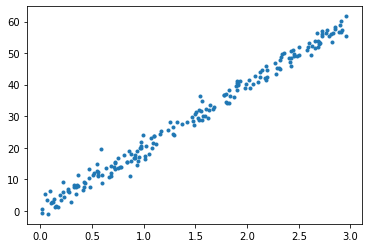

In [ ]:
# graficamos la dispersion denuestros puntos
plt.plot(xy[:,0], xy[:,1], '.')
# de xy todas las filas y la columna "x"
# de xy todas las filas y la columna "y"
plt.show()

observamos que tenemos un conjunto de datos altamente correlacionados.

Que implica esto sobre las dimensiones? lo que logramos entender es que si nosotros graficaramos los puntos de otra manera podriamos eliminar una de las dimensiones (hacer una proyeccion a "x" o a "y") porque si sabemos en que lugar se encuentra nuestro "x", por ejemplo si "x" se encuentra cerca del cero, sabemos que "y" va a variar entre 0 y 10, si "x" esta en 3, "y" tomara valores entre 50 y 60. Observamos cuanta informacion estariamos perdiendo en caso de quedarnos con una sola variable, si lo hacemos de esta manera quiza la informacion seria mucha

Veamos como podemos **girar** nuestro sistema  de referencia sobre el plano cartesiano, la base, los vectores generadores para que de esta manera nuestra informacion quede representada con la mayor varianza sobre cada uno de los ejes y asi poder elegir que eje es el que nos quedaremos.



In [ ]:
# Centramos la informacion
xy_centrado = xy - np.mean(xy, axis = 0)

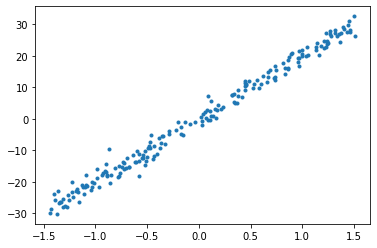

In [ ]:
# graficamos
plt.plot(xy_centrado[:,0], xy_centrado[:,1], '.')

plt.show()

Para poder encontrar las componentes principales necesitamos resolver un problema.







Estas componentes son las que maximixan la funcion de la traza de d.T * x.T * xd con la restriccion de que  el resultado tenga norma 1
 d.T * d = 1

In [ ]:
autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
print(autovalores)

[    1.85050946 62875.95936384]


In [ ]:
print(autovectores)

[[-0.9987754  -0.04947417]
 [ 0.04947417 -0.9987754 ]]


In [ ]:
# Autovector 1 columna 0 
print(autovectores[:,0])

[-0.9987754   0.04947417]


In [ ]:
# Autovector 2 columna 1 
print(autovectores[:,1])

[-0.04947417 -0.9987754 ]


Con este numero de autovectores vemos que son los que maximizan nuestra funcion, cada columna esta asociada con un autovalor, el vector asociado con el autovalor mas grande nos dice la direccion de maxima varianza.

En este caso el autovalor  62875.95936384 y el autovector [-0.04947417 -0.9987754 ]

### Graficamos con nuestra funcion graficarVectores

In [ ]:
%run './funciones_auxiliares/graficarVectores.ipynb'

Queremos ver como es que estos autovectores calculados estan relacionados con la direccion en la cual se mueve nuestra informacion. 

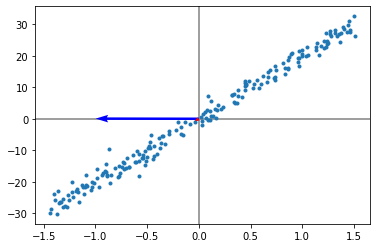

In [ ]:
graficarVectores(autovectores.T, ['blue', 'red'])
plt.plot(xy_centrado[:, 0], xy_centrado[:,1], '.')

plt.show()

Aqui vemos como es que estan relacionados los autovectores, pero nos ha quedado uno con una amplitud muy pequeña (punto rojo), aqui lo que nos queda es amplificarlo, porque como sabemos no importa que este teniendo este autovector en particular sino **cual es el autovector que esta relacionado con el autovalor mas grande**

Recuerda: El autovalor  mas grande es el que define cual es la direccion que contiene mas informacion. 

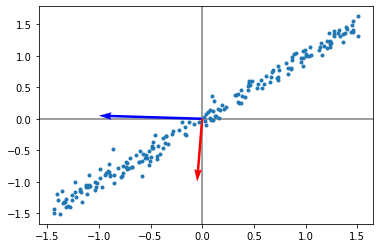

In [ ]:
graficarVectores(autovectores.T, ['blue', 'red'])
plt.plot(xy_centrado[:, 0], xy_centrado[:,1]/20, '.')

plt.show()

Verificamos quien de los autovalores es mayor

In [ ]:
print(autovalores)

[    1.85050946 62875.95936384]


Por lo que a mayoria de datos refieren al vector rojo

In [ ]:
# hacemos la proyeccion de nuestros puntos con el nuevo sistema de referencia
xy_nuevo = autovectores.T.dot(xy_centrado.T)

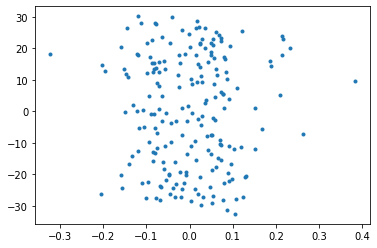

In [ ]:
# graficamos  tomando las columnas
plt.plot(xy_nuevo[0, :], xy_nuevo[1,:], '.')

plt.show()

Visto de estamanera lavariable Y esta capturando almenos el 80% de toda la varinza